In [1]:
import tensorflow 
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.layers import Dense
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
#from tensorflow.keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
#from keras.applications.mobilenet import MobileNet
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\Owner\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
test_dir="test/"
train_dir="train/"
val_dir="val/"

In [3]:
def create_data3(mainDir):
    trainingData=[]
    #label=[]
    #labelName=[]
    categories=['CNV', 'DME', 'DRUSEN', 'NORMAL']
    for folder in os.listdir(mainDir):  ##list all folders in mainDir
        if not folder.startswith('.'):
            foldername=folder
            foldernumber=categories.index(folder)
            folderpath=os.path.join(mainDir,folder)
        for img in os.listdir(folderpath):
            if not img.startswith('.'):
                imagepath=os.path.join(folderpath+'/' + img)
                imageArray=cv2.imread(imagepath,cv2.IMREAD_GRAYSCALE)
                newArray=cv2.resize(imageArray,(224,224,))
                #trainingData.append(newArray)
                #label.append(foldernumber)
                #labelName.append(foldername)
                trainingData.append([newArray,foldernumber,foldername]) 
    return trainingData                     

In [4]:
train_data=create_data3(train_dir) 

In [39]:
import random
random.shuffle(train_data)

In [6]:
train_arrays=[]
train_labels=[]
train_names=[]
for i,j,k in train_data:
    train_arrays.append(i)
    train_labels.append(j)
    train_names.append(k) 

In [7]:
test_data=create_data3(test_dir) 
import random
random.shuffle(test_data)
test_arrays=[]
test_labels=[]
test_names=[]
for i,j,k in test_data:
    test_arrays.append(i)
    test_labels.append(j)
    test_names.append(k)

In [8]:
val_data=create_data3(val_dir) 
import random
random.shuffle(val_data)
val_arrays=[]
val_labels=[]
val_names=[]
for i,j,k in val_data:
    val_arrays.append(i)
    val_labels.append(j)
    val_names.append(k)

In [40]:
##train_arrays=np.array(train_arrays).reshape(-1,224,224)  Needed later
X = np.asarray(train_arrays)
X.shape
#train_images = train_arrays.reshape((train_arrays.shape[0], 224 * 224))
#train_images = train_arrays.astype('float32') / 255
#test_images = test_images.reshape((10000, 28 * 28))
#test_images = test_images.astype('float32') / 255
#y = np.asarray(train_names)

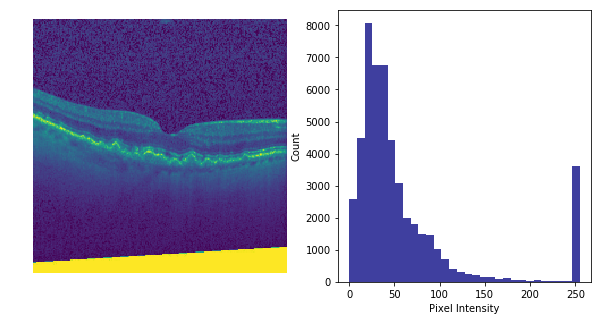

In [41]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X[0])

Normal


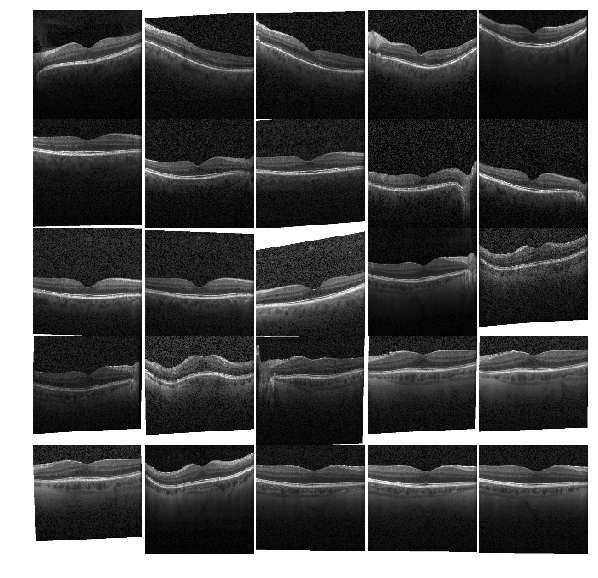

In [42]:
print("Normal")
#C:\Users\Owner\Desktop\OCT2017_\train\NORMAL
multipleImages = glob('train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

CNV


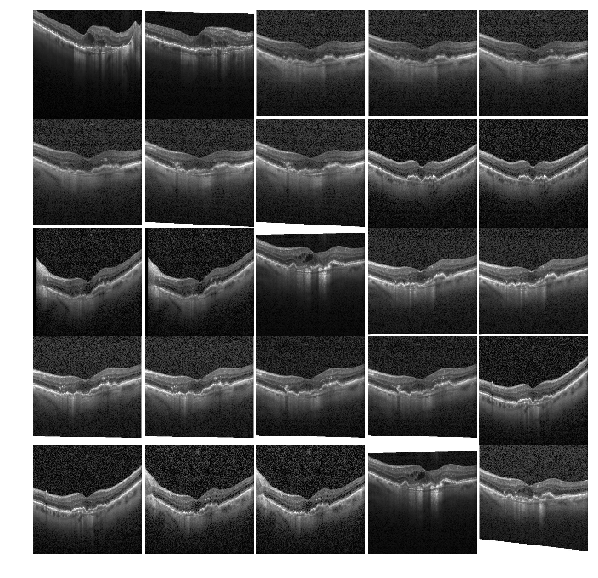

In [43]:
print("CNV")
multipleImages = glob('train/CNV/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

DME


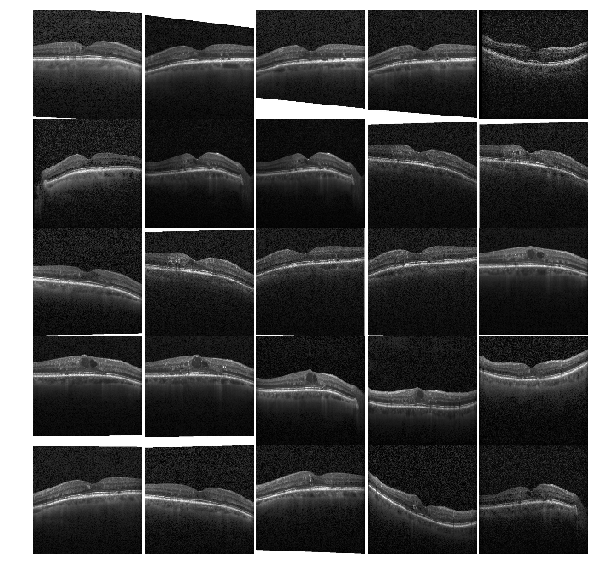

In [44]:
print("DME")
multipleImages = glob('train/DME/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

DRUSEN


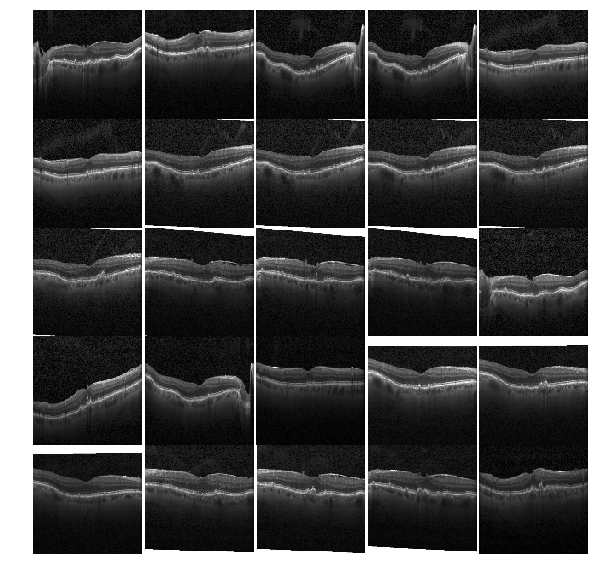

In [45]:
print("DRUSEN")
multipleImages = glob('train/DRUSEN/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

{0: 'Normal', 1: 'CNV', 2: 'DME', 3: 'DRUSEN'}


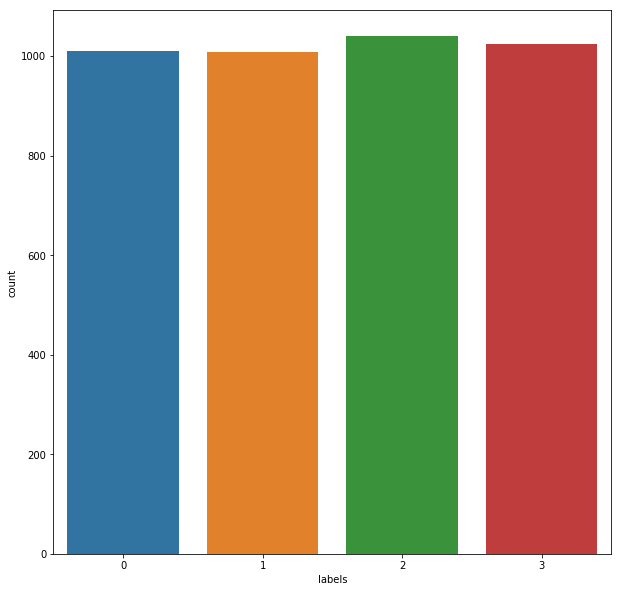

In [46]:
map_characters = {0: 'Normal', 1: 'CNV', 2: 'DME', 3: 'DRUSEN'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=train_labels
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [52]:
y_trainHot = to_categorical(train_labels, num_classes = 4)
y_testHot = to_categorical(test_labels, num_classes = 4)

In [59]:
pretrained_model_1 = VGG16(weights =  VGG16('vgg16_weights.h5'), include_top=False, input_shape=(224, 224, 3))

103751680/553467096 [====>.........................] - ETA:  - ETA: 9: - ETA: 6: - ETA: 5: - ETA: 5: - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3:

390258688/553467096 [====================>.........] - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 

490094592/553467096 [=========================>....] - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 

553467904/553467096 [==============================] - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 

KeyboardInterrupt: 

In [4]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,target_size=(224, 224),batch_size=20, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224),
batch_size=20, class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(val_dir,target_size=(224, 224),
batch_size=20,
class_mode='categorical')

Found 4082 images belonging to 4 classes.
Found 968 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 128)       147584    
__________

In [11]:
history = model.fit_generator(
generator=train_generator,
steps_per_epoch=30,
epochs=50,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/50
30/30 [==============================] - ETA: 3:55 - loss: 1.3960 - acc: 0.100 - ETA: 2:42 - loss: 1.3986 - acc: 0.125 - ETA: 2:10 - loss: 1.3879 - acc: 0.200 - ETA: 1:51 - loss: 1.3878 - acc: 0.237 - ETA: 1:39 - loss: 1.3857 - acc: 0.260 - ETA: 1:35 - loss: 1.3869 - acc: 0.266 - ETA: 1:29 - loss: 1.3873 - acc: 0.264 - ETA: 1:22 - loss: 1.3889 - acc: 0.256 - ETA: 1:16 - loss: 1.3892 - acc: 0.266 - ETA: 1:11 - loss: 1.3906 - acc: 0.255 - ETA: 1:07 - loss: 1.3903 - acc: 0.259 - ETA: 1:04 - loss: 1.3893 - acc: 0.258 - ETA: 1:00 - loss: 1.3888 - acc: 0.261 - ETA: 56s - loss: 1.3896 - acc: 0.250 - ETA: 52s - loss: 1.3896 - acc: 0.24 - ETA: 49s - loss: 1.3897 - acc: 0.24 - ETA: 45s - loss: 1.3883 - acc: 0.25 - ETA: 41s - loss: 1.3872 - acc: 0.25 - ETA: 38s - loss: 1.3859 - acc: 0.26 - ETA: 34s - loss: 1.3836 - acc: 0.27 - ETA: 31s - loss: 1.3813 - acc: 0.26 - ETA: 27s - loss: 1.3816 - acc: 0.27 - ETA: 24s - loss: 1.3774 - acc: 0.28 - ETA: 20s - loss: 1.3819 - acc: 0.27 - ETA: 17s 

30/30 [==============================] - ETA: 1:34 - loss: 1.1087 - acc: 0.550 - ETA: 1:46 - loss: 1.1118 - acc: 0.525 - ETA: 1:48 - loss: 1.0671 - acc: 0.550 - ETA: 1:46 - loss: 1.0778 - acc: 0.537 - ETA: 1:40 - loss: 1.0670 - acc: 0.560 - ETA: 1:38 - loss: 1.0896 - acc: 0.516 - ETA: 1:33 - loss: 1.0708 - acc: 0.542 - ETA: 1:27 - loss: 1.0790 - acc: 0.537 - ETA: 1:21 - loss: 1.1029 - acc: 0.527 - ETA: 1:18 - loss: 1.1002 - acc: 0.520 - ETA: 1:15 - loss: 1.1019 - acc: 0.509 - ETA: 1:11 - loss: 1.1030 - acc: 0.512 - ETA: 1:07 - loss: 1.1061 - acc: 0.507 - ETA: 1:03 - loss: 1.0814 - acc: 0.528 - ETA: 59s - loss: 1.1060 - acc: 0.523 - ETA: 55s - loss: 1.1083 - acc: 0.52 - ETA: 50s - loss: 1.1127 - acc: 0.52 - ETA: 46s - loss: 1.1364 - acc: 0.50 - ETA: 43s - loss: 1.1271 - acc: 0.51 - ETA: 39s - loss: 1.1361 - acc: 0.50 - ETA: 35s - loss: 1.1280 - acc: 0.51 - ETA: 31s - loss: 1.1190 - acc: 0.52 - ETA: 27s - loss: 1.1190 - acc: 0.52 - ETA: 23s - loss: 1.1266 - acc: 0.51 - ETA: 19s - loss: 1

30/30 [==============================] - ETA: 1:27 - loss: 0.8988 - acc: 0.550 - ETA: 1:24 - loss: 0.9758 - acc: 0.525 - ETA: 1:24 - loss: 1.0895 - acc: 0.516 - ETA: 1:27 - loss: 1.0334 - acc: 0.562 - ETA: 1:23 - loss: 1.0483 - acc: 0.560 - ETA: 1:19 - loss: 1.0035 - acc: 0.608 - ETA: 1:14 - loss: 0.9636 - acc: 0.635 - ETA: 1:13 - loss: 0.9912 - acc: 0.606 - ETA: 1:10 - loss: 0.9734 - acc: 0.605 - ETA: 1:06 - loss: 0.9433 - acc: 0.620 - ETA: 1:02 - loss: 0.9292 - acc: 0.627 - ETA: 59s - loss: 0.9281 - acc: 0.633 - ETA: 56s - loss: 0.9252 - acc: 0.62 - ETA: 53s - loss: 0.9247 - acc: 0.62 - ETA: 50s - loss: 0.9309 - acc: 0.61 - ETA: 46s - loss: 0.9428 - acc: 0.60 - ETA: 43s - loss: 0.9547 - acc: 0.59 - ETA: 40s - loss: 0.9492 - acc: 0.60 - ETA: 37s - loss: 0.9571 - acc: 0.59 - ETA: 33s - loss: 0.9510 - acc: 0.59 - ETA: 30s - loss: 0.9470 - acc: 0.60 - ETA: 27s - loss: 0.9437 - acc: 0.60 - ETA: 23s - loss: 0.9429 - acc: 0.60 - ETA: 20s - loss: 0.9466 - acc: 0.60 - ETA: 16s - loss: 0.9565 

30/30 [==============================] - ETA: 1:42 - loss: 0.7697 - acc: 0.800 - ETA: 1:44 - loss: 0.8593 - acc: 0.725 - ETA: 1:36 - loss: 0.8179 - acc: 0.716 - ETA: 1:28 - loss: 0.8101 - acc: 0.712 - ETA: 1:23 - loss: 0.8580 - acc: 0.680 - ETA: 1:20 - loss: 0.8536 - acc: 0.683 - ETA: 1:18 - loss: 0.8375 - acc: 0.671 - ETA: 1:14 - loss: 0.8577 - acc: 0.656 - ETA: 1:09 - loss: 0.8567 - acc: 0.655 - ETA: 1:05 - loss: 0.8829 - acc: 0.645 - ETA: 1:03 - loss: 0.8760 - acc: 0.636 - ETA: 1:00 - loss: 0.8892 - acc: 0.629 - ETA: 56s - loss: 0.8788 - acc: 0.642 - ETA: 52s - loss: 0.8820 - acc: 0.64 - ETA: 49s - loss: 0.8790 - acc: 0.65 - ETA: 46s - loss: 0.8656 - acc: 0.65 - ETA: 43s - loss: 0.8824 - acc: 0.65 - ETA: 39s - loss: 0.8761 - acc: 0.65 - ETA: 36s - loss: 0.8681 - acc: 0.65 - ETA: 32s - loss: 0.8661 - acc: 0.65 - ETA: 30s - loss: 0.8639 - acc: 0.65 - ETA: 26s - loss: 0.8525 - acc: 0.65 - ETA: 23s - loss: 0.8485 - acc: 0.66 - ETA: 19s - loss: 0.8460 - acc: 0.66 - ETA: 16s - loss: 0.839

30/30 [==============================] - ETA: 1:33 - loss: 0.9262 - acc: 0.650 - ETA: 8:27:59 - loss: 0.7840 - acc: 0.70 - ETA: 5:27:20 - loss: 0.7402 - acc: 0.71 - ETA: 3:56:55 - loss: 0.7024 - acc: 0.72 - ETA: 3:02:37 - loss: 0.6842 - acc: 0.73 - ETA: 2:26:20 - loss: 0.6842 - acc: 0.72 - ETA: 2:00:25 - loss: 0.6917 - acc: 0.72 - ETA: 1:40:57 - loss: 0.6571 - acc: 0.75 - ETA: 1:25:49 - loss: 0.6479 - acc: 0.75 - ETA: 1:13:43 - loss: 0.6525 - acc: 0.74 - ETA: 1:03:46 - loss: 0.6607 - acc: 0.74 - ETA: 55:28 - loss: 0.6422 - acc: 0.7458 - ETA: 48:27 - loss: 0.6455 - acc: 0.74 - ETA: 42:25 - loss: 0.6433 - acc: 0.74 - ETA: 37:10 - loss: 0.6690 - acc: 0.74 - ETA: 32:34 - loss: 0.6929 - acc: 0.72 - ETA: 28:30 - loss: 0.6929 - acc: 0.72 - ETA: 24:54 - loss: 0.7041 - acc: 0.73 - ETA: 21:39 - loss: 0.6974 - acc: 0.73 - ETA: 18:44 - loss: 0.6906 - acc: 0.74 - ETA: 16:04 - loss: 0.6875 - acc: 0.74 - ETA: 13:40 - loss: 0.6770 - acc: 0.74 - ETA: 11:27 - loss: 0.6785 - acc: 0.74 - ETA: 9:25 - loss:

30/30 [==============================] - ETA: 1:57 - loss: 0.6250 - acc: 0.800 - ETA: 1:51 - loss: 0.7192 - acc: 0.725 - ETA: 1:45 - loss: 0.5902 - acc: 0.800 - ETA: 1:37 - loss: 0.5465 - acc: 0.812 - ETA: 1:34 - loss: 0.5566 - acc: 0.810 - ETA: 1:30 - loss: 0.5565 - acc: 0.816 - ETA: 1:26 - loss: 0.5613 - acc: 0.821 - ETA: 1:20 - loss: 0.5452 - acc: 0.831 - ETA: 1:16 - loss: 0.5806 - acc: 0.816 - ETA: 1:13 - loss: 0.5781 - acc: 0.805 - ETA: 1:09 - loss: 0.5762 - acc: 0.813 - ETA: 1:04 - loss: 0.5815 - acc: 0.808 - ETA: 1:00 - loss: 0.5658 - acc: 0.819 - ETA: 53s - loss: 0.5477 - acc: 0.832 - ETA: 50s - loss: 0.5589 - acc: 0.83 - ETA: 47s - loss: 0.5475 - acc: 0.82 - ETA: 43s - loss: 0.5647 - acc: 0.81 - ETA: 39s - loss: 0.5632 - acc: 0.81 - ETA: 36s - loss: 0.5655 - acc: 0.80 - ETA: 33s - loss: 0.5706 - acc: 0.80 - ETA: 30s - loss: 0.5641 - acc: 0.80 - ETA: 26s - loss: 0.5731 - acc: 0.80 - ETA: 23s - loss: 0.5625 - acc: 0.80 - ETA: 19s - loss: 0.5648 - acc: 0.80 - ETA: 16s - loss: 0.5

30/30 [==============================] - ETA: 1:55 - loss: 0.7118 - acc: 0.800 - ETA: 1:50 - loss: 0.6392 - acc: 0.750 - ETA: 1:40 - loss: 0.5735 - acc: 0.783 - ETA: 1:32 - loss: 0.6237 - acc: 0.750 - ETA: 1:29 - loss: 0.6462 - acc: 0.730 - ETA: 1:29 - loss: 0.5933 - acc: 0.758 - ETA: 1:27 - loss: 0.5953 - acc: 0.757 - ETA: 1:21 - loss: 0.5645 - acc: 0.775 - ETA: 1:17 - loss: 0.5659 - acc: 0.772 - ETA: 1:14 - loss: 0.5759 - acc: 0.765 - ETA: 1:11 - loss: 0.5639 - acc: 0.768 - ETA: 1:07 - loss: 0.5702 - acc: 0.762 - ETA: 1:03 - loss: 0.5584 - acc: 0.769 - ETA: 59s - loss: 0.5608 - acc: 0.771 - ETA: 56s - loss: 0.5549 - acc: 0.77 - ETA: 52s - loss: 0.5449 - acc: 0.78 - ETA: 48s - loss: 0.5382 - acc: 0.78 - ETA: 45s - loss: 0.5419 - acc: 0.78 - ETA: 42s - loss: 0.5348 - acc: 0.78 - ETA: 37s - loss: 0.5405 - acc: 0.78 - ETA: 33s - loss: 0.5520 - acc: 0.78 - ETA: 30s - loss: 0.5537 - acc: 0.77 - ETA: 26s - loss: 0.5605 - acc: 0.77 - ETA: 22s - loss: 0.5502 - acc: 0.78 - ETA: 18s - loss: 0.5

30/30 [==============================] - ETA: 2:27 - loss: 0.5386 - acc: 0.750 - ETA: 2:27 - loss: 0.5845 - acc: 0.750 - ETA: 2:17 - loss: 0.4975 - acc: 0.783 - ETA: 2:03 - loss: 0.5268 - acc: 0.775 - ETA: 1:59 - loss: 0.5397 - acc: 0.780 - ETA: 1:50 - loss: 0.5105 - acc: 0.800 - ETA: 1:45 - loss: 0.4772 - acc: 0.821 - ETA: 1:39 - loss: 0.4474 - acc: 0.837 - ETA: 1:32 - loss: 0.4287 - acc: 0.844 - ETA: 1:26 - loss: 0.4330 - acc: 0.845 - ETA: 1:21 - loss: 0.4520 - acc: 0.845 - ETA: 1:17 - loss: 0.4655 - acc: 0.837 - ETA: 1:11 - loss: 0.4915 - acc: 0.830 - ETA: 1:06 - loss: 0.4941 - acc: 0.832 - ETA: 1:02 - loss: 0.5090 - acc: 0.820 - ETA: 58s - loss: 0.5032 - acc: 0.818 - ETA: 54s - loss: 0.4916 - acc: 0.82 - ETA: 50s - loss: 0.4887 - acc: 0.82 - ETA: 46s - loss: 0.4843 - acc: 0.82 - ETA: 42s - loss: 0.4810 - acc: 0.82 - ETA: 37s - loss: 0.4855 - acc: 0.81 - ETA: 33s - loss: 0.4886 - acc: 0.81 - ETA: 29s - loss: 0.4854 - acc: 0.82 - ETA: 25s - loss: 0.4819 - acc: 0.82 - ETA: 21s - loss:

30/30 [==============================] - ETA: 1:50 - loss: 0.4652 - acc: 0.750 - ETA: 1:59 - loss: 0.4833 - acc: 0.750 - ETA: 2:07 - loss: 0.4742 - acc: 0.766 - ETA: 1:53 - loss: 0.4821 - acc: 0.775 - ETA: 1:42 - loss: 0.4422 - acc: 0.800 - ETA: 1:37 - loss: 0.4912 - acc: 0.791 - ETA: 1:32 - loss: 0.4750 - acc: 0.800 - ETA: 1:25 - loss: 0.4700 - acc: 0.806 - ETA: 1:19 - loss: 0.4584 - acc: 0.816 - ETA: 1:14 - loss: 0.4388 - acc: 0.825 - ETA: 1:11 - loss: 0.4397 - acc: 0.818 - ETA: 1:07 - loss: 0.4327 - acc: 0.825 - ETA: 1:02 - loss: 0.4268 - acc: 0.826 - ETA: 58s - loss: 0.4309 - acc: 0.825 - ETA: 54s - loss: 0.4241 - acc: 0.82 - ETA: 51s - loss: 0.4141 - acc: 0.83 - ETA: 47s - loss: 0.3982 - acc: 0.83 - ETA: 43s - loss: 0.3947 - acc: 0.83 - ETA: 39s - loss: 0.3959 - acc: 0.83 - ETA: 36s - loss: 0.4145 - acc: 0.83 - ETA: 32s - loss: 0.4124 - acc: 0.83 - ETA: 28s - loss: 0.4172 - acc: 0.83 - ETA: 25s - loss: 0.4179 - acc: 0.83 - ETA: 22s - loss: 0.4207 - acc: 0.82 - ETA: 18s - loss: 0.4

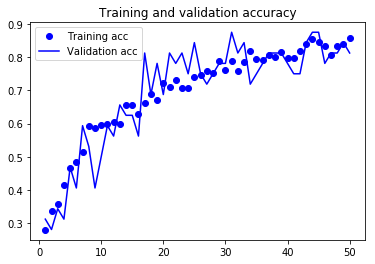

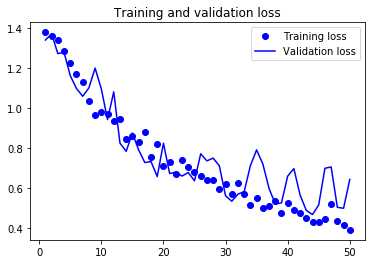

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.7398785437166933


In [38]:
Y_pred = model.predict_generator(test_generator,50)
y_pred = np.argmax(Y_pred, axis=1)

In [37]:
lbs=test_generator.classes
len(y_pred)

640

In [39]:
#cm=confusion_matrix(test_generator.classes, y_pred)

In [24]:
model = VGG16()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [41]:
X=np.array(X).reshape(-1,224,224)

In [42]:
X.shape

(4082, 224, 224)

In [54]:
#y = np.asarray(train_labels)

In [62]:
X = np.asarray(test_arrays)

In [63]:
X2d=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X2d.shape

(968, 50176)

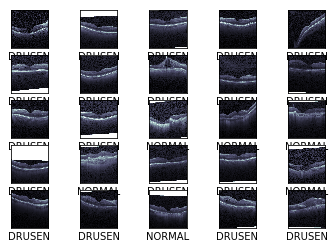

In [49]:
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(train_arrays[i], cmap='bone')
    axi.set(xticks=[], yticks=[],xlabel=train_names[train_labels[i]])

In [64]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [66]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X2d, test_labels,
                                                random_state=42)

In [67]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)

Wall time: 1min 40s


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('randomizedpca', RandomizedPCA(copy=True, iterated_power=2, n_components=150, random_state=42,
       whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [68]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.001}


In [71]:
model = grid.best_estimator_
yfit = model.predict(Xtest)
yfit

array([2, 0, 3, 1, 0, 3, 0, 2, 3, 3, 0, 3, 1, 3, 0, 2, 0, 0, 3, 2, 1, 3,
       1, 1, 1, 1, 3, 3, 2, 1, 0, 3, 2, 2, 3, 1, 3, 0, 3, 1, 0, 2, 2, 3,
       3, 2, 1, 2, 0, 3, 3, 2, 3, 2, 0, 3, 0, 1, 2, 1, 2, 3, 3, 3, 0, 3,
       0, 1, 3, 3, 0, 2, 1, 1, 3, 2, 0, 3, 2, 1, 3, 3, 1, 1, 3, 2, 1, 1,
       3, 3, 2, 0, 3, 3, 2, 2, 1, 0, 0, 3, 0, 1, 1, 0, 3, 2, 3, 2, 2, 0,
       3, 2, 2, 3, 2, 1, 3, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 3, 2, 0, 2, 0, 2, 3, 2, 1, 0, 3, 0,
       0, 3, 2, 2, 2, 3, 0, 2, 3, 2, 1, 2, 3, 1, 2, 2, 0, 0, 0, 1, 2, 3,
       2, 2, 0, 3, 1, 0, 1, 0, 1, 3, 1, 2, 3, 1, 3, 3, 3, 0, 0, 2, 1, 3,
       2, 1, 3, 3, 1, 3, 3, 0, 0, 0, 0, 2, 0, 3, 1, 3, 3, 0, 3, 3, 3, 1,
       1, 2, 3, 3, 3, 2, 3, 1, 0, 3, 1, 1, 2, 2, 3, 0, 2, 3, 2, 1, 2, 3])

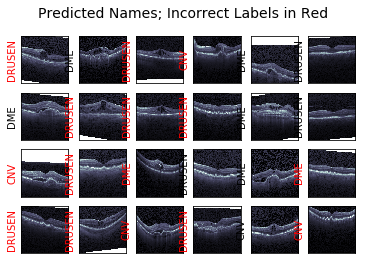

In [72]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(224, 224), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(test_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [73]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=test_names))

             precision    recall  f1-score   support

        DME       0.54      0.45      0.49        60
        CNV       0.54      0.38      0.45        65
     DRUSEN       0.47      0.48      0.47        65
     DRUSEN       0.46      0.71      0.56        52

avg / total       0.51      0.50      0.49       242



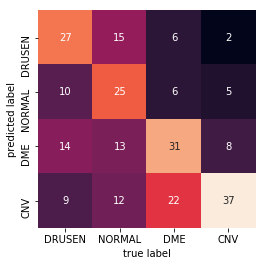

In [79]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=set(test_names), yticklabels=set(test_names))
plt.xlabel('true label')
plt.ylabel('predicted label');

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X2d)
kmeans.cluster_centers_.shape

(4, 50176)

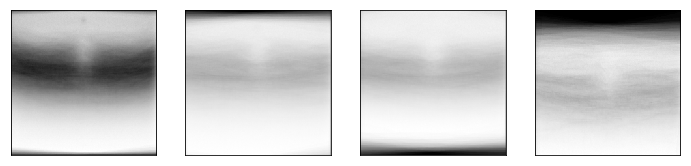

In [83]:
fig, ax = plt.subplots(1, 4, figsize=(12, 8))
centers = kmeans.cluster_centers_.reshape(4, 224, 224)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

TypeError: only integer scalar arrays can be converted to a scalar index

In [93]:
def create_data1(mainDir):
    trainingData=[]
    label=[]
    labelName=[]
    categories=['CNV', 'DME', 'DRUSEN', 'NORMAL']
    for folder in os.listdir(mainDir):  ##list all folders in mainDir
        if not folder.startswith('.'):
            foldername=folder
            foldernumber=categories.index(folder)
            folderpath=os.path.join(mainDir,folder)
        for img in os.listdir(folderpath):
            if not img.startswith('.'):
                imagepath=os.path.join(folderpath+'/' + img)
                imageArray=cv2.imread(imagepath,cv2.IMREAD_GRAYSCALE)
                newArray=cv2.resize(imageArray,(224,224,))
                trainingData.append(newArray)
                label.append(foldernumber)
                labelName.append(foldername)
                #print(foldernumber,newArray,foldername)
    
    imageData=pd.DataFrame({"data":trainingData,"taget":label,"target_names":labelName}) 
    return imageData        

In [94]:
dt=create_data1(test_dir)

In [96]:
Xd=np.array(dt.data)

In [99]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = mode(dt.taget[mask])[0]

In [100]:
labels

array([0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 3, 3, 0,
       2, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0,
       3, 0, 2, 3, 2, 0, 0, 1, 3, 0, 0, 1, 1, 0, 0, 0, 1, 1, 3, 3, 0, 3,
       0, 3, 0, 0, 2, 0, 1, 3, 2, 0, 3, 0, 1, 1, 3, 0, 0, 1, 1, 0, 0, 0,
       0, 2, 0, 3, 0, 0, 2, 0, 1, 0, 0, 1, 2, 3, 0, 3, 3, 3, 3, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 3, 1, 0, 0, 0, 0, 3,
       1, 3, 3, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 3, 1, 3, 3, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 1, 1, 3, 0,
       0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0,
       0, 0, 1, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 3, 1, 3, 0, 2, 2, 0,
       0, 0, 2, 3, 3, 1, 2, 0, 0, 3, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 3, 0, 0, 3, 3, 3, 1, 3, 0, 0, 0, 0, 0, 2, 3, 1, 1, 0, 1,
       3, 0, 0, 0, 1, 3, 0, 1, 2, 3, 1, 3, 0, 1, 1,

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(dt.taget, labels)

0.27582644628099173

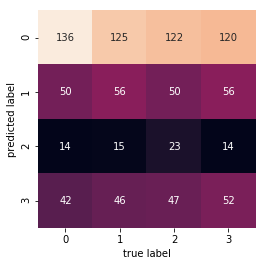

In [103]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(dt.taget, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=set(dt.taget),
            yticklabels=set(dt.taget))
plt.xlabel('true label')
plt.ylabel('predicted label');

In [106]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(X2d)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = mode(dt.taget[mask])[0]

# Compute the accuracy
accuracy_score(dt.taget, labels)

0.2510330578512397